###这是操作实例###

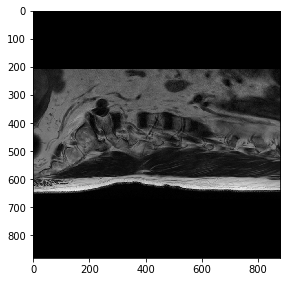

In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

example_filename = os.path.join('./train/image/Case1.nii.gz')

import nibabel as nib
img = nib.load(example_filename)

img.shape

img.get_data_dtype() == np.dtype(np.int16)

img.affine.shape

data = img.get_fdata()
data.shape

type(data)

new_data = np.rollaxis(data, 2, 0)

new_data.shape

np.savetxt('test1.txt', new_data[0], fmt='%d')
b = np.loadtxt('test1.txt', dtype=int)

plt.figure(figsize=(10,10)) 
plt.subplot(221)
plt.imshow(new_data[0], cmap='gray')

###提取原始图片为numpy 只要修改地址就可运行###

In [5]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
!mkdir ./output
!mkdir ./output/train
!mkdir ./output/train/image/

In [7]:
base_dir = os.path.join('./train/image/')
out_dir = os.path.join('./output/train/image/')

In [14]:
def save(filename): 
    img = nib.load(filename)
    data = img.get_fdata()
    new_data = np.rollaxis(data, 2, 0)
    for i in range(12):
        tl = os.path.join(out_dir, filename.split('/')[-1] + '_' + str(i) + '.npy')
        np.save(tl, new_data[i])

In [15]:
for fname in os.listdir(base_dir):
    file = os.path.join(base_dir, fname)
    save(file)

###提取mark为numpy 只要修改地址就可运行####

In [ ]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
!mkdir ./output/train/mark/

In [19]:
base_dir = os.path.join('./train/groundtruth/')
out_dir = os.path.join('./output/train/mark/')

In [20]:
def save(filename): 
    img = nib.load(filename)
    data = img.get_fdata()
    new_data = np.rollaxis(data, 2, 0)
    for i in range(12):
        tl = os.path.join(out_dir, filename.split('/')[-1] + '_' + str(i) + '.npy')
        np.save(tl, new_data[i])

In [21]:
for fname in os.listdir(base_dir):
    file = os.path.join(base_dir, fname)
    save(file)

###如何相乘原始和mark###

In [58]:
a = np.load('./output/train/image/Case16.nii.gz_5.npy')
b = np.load('./output/train/mark/mask_case16.nii.gz_5.npy')
c = a * b

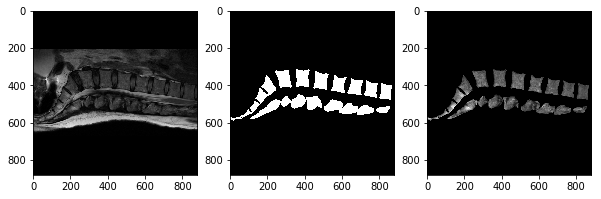

In [60]:
plt.figure(figsize=(10,10)) 
plt.subplot(231)
plt.imshow(a, cmap='gray')
plt.subplot(232)
plt.imshow(b, cmap='gray')
plt.subplot(233)
plt.imshow(c, cmap='gray')

###通过mark提取 只要修改三个地址就可运行###

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
!mkdir ./output/train/marked/

In [37]:
# 1 原始图片地址
image_dir = os.path.join('./output/train/image/')
# 2 mark图片地址
mark_dir = os.path.join('./output/train/mark/')
# 3 输出图片地址
marked_dir = os.path.join('./output/train/marked/')

In [38]:
head_image = 'C'
head_mark = 'mask_c'
#same ase81.nii.gz_11.npy

In [39]:
def muti(f1, f2):
    a = np.load(f1)
    b = np.load(f2)
    c = a * b
    return c

In [42]:
for fname in os.listdir(image_dir):
    sub_name = fname[1:]
    mark = head_mark + sub_name
    
    file_mark = os.path.join(mark_dir, mark)
    file_image = os.path.join(image_dir, fname)
    
    file_marked = muti(file_mark, file_image)
    tl = os.path.join(marked_dir, fname.split('/')[-1])
    np.save(tl, file_marked)
    